In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\\Career\\GradProj\\New deal\\Dataset\\parkinson_data.csv')
df.drop('Unnamed: 0', axis = 1,inplace=True)

df.columns = ['Time',
 'AccV',
 'AccML',
 'AccAP',
 'StartHesitation',
 'Turn',
 'Walking',
 'idx',
 'ID',
 'len_df']

In [3]:
df['class'] = np.array(df['Walking'] | df['StartHesitation'] | df['Turn'],dtype = int)



# Compute the mean and standard deviation of the dataset
data = np.asarray(df[['AccV','AccML','AccAP']] , dtype = np.float64)
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

df[['AccV','AccML','AccAP']] = abs((data - mean) / std)

In [4]:
df = df.groupby(np.arange(len(df)) // (2*128)).mean() 

In [5]:
df

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,idx,len_df,class
0,127.5,0.342622,0.184836,0.708830,0.0,0.0,0.0,0.0,7400.0,0.0
1,383.5,0.344450,0.187066,0.709368,0.0,0.0,0.0,0.0,7400.0,0.0
2,639.5,0.344985,0.186624,0.709024,0.0,0.0,0.0,0.0,7400.0,0.0
3,895.5,0.342983,0.183776,0.706321,0.0,0.0,0.0,0.0,7400.0,0.0
4,1151.5,0.513841,0.189535,0.632046,0.0,0.0,0.0,0.0,7400.0,0.0
...,...,...,...,...,...,...,...,...,...,...
27584,4117.5,1.417521,0.851438,0.451887,0.0,0.0,0.0,832.0,5158.0,0.0
27585,4373.5,1.001252,0.710904,0.373929,0.0,0.0,0.0,832.0,5158.0,0.0
27586,4629.5,0.994092,1.086636,0.653726,0.0,0.0,0.0,832.0,5158.0,0.0
27587,4885.5,1.350491,0.483442,1.558683,0.0,0.0,0.0,832.0,5158.0,0.0


<AxesSubplot:>

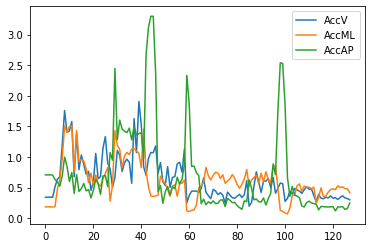

In [6]:
df[['AccV','AccML','AccAP']][0:128].plot()

In [7]:
df[['class']] = np.asarray(df[['class']]>0,dtype = int)

In [8]:
df

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,idx,len_df,class
0,127.5,0.342622,0.184836,0.708830,0.0,0.0,0.0,0.0,7400.0,0
1,383.5,0.344450,0.187066,0.709368,0.0,0.0,0.0,0.0,7400.0,0
2,639.5,0.344985,0.186624,0.709024,0.0,0.0,0.0,0.0,7400.0,0
3,895.5,0.342983,0.183776,0.706321,0.0,0.0,0.0,0.0,7400.0,0
4,1151.5,0.513841,0.189535,0.632046,0.0,0.0,0.0,0.0,7400.0,0
...,...,...,...,...,...,...,...,...,...,...
27584,4117.5,1.417521,0.851438,0.451887,0.0,0.0,0.0,832.0,5158.0,0
27585,4373.5,1.001252,0.710904,0.373929,0.0,0.0,0.0,832.0,5158.0,0
27586,4629.5,0.994092,1.086636,0.653726,0.0,0.0,0.0,832.0,5158.0,0
27587,4885.5,1.350491,0.483442,1.558683,0.0,0.0,0.0,832.0,5158.0,0


In [9]:
x = df[['AccV','AccML','AccAP']]
y = df[['class']]

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

from sklearn.svm import SVC

clf = SVC(verbose = 1)
clf.fit(x_train, y_train)
clf.score(x_train, y_train),clf.score(x_test, y_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

(0.7374835757328622, 0.7343240304458137)

In [11]:
clf = SVC(verbose = 1, kernel='poly')
clf.fit(x_train, y_train)
clf.score(x_train, y_train),clf.score(x_test, y_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

(0.6994698926192742, 0.6948169626676332)

In [12]:
clf = SVC(verbose = 1, kernel='linear')
clf.fit(x_train, y_train)
clf.score(x_train, y_train),clf.score(x_test, y_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

(0.654795886004259, 0.6438927147517216)

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(max_depth=3, random_state=0, verbose = 1)
clf2.fit(x_train, y_train)
clf2.score(x_train, y_train),clf2.score(x_test, y_test)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_29748\4166748596.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(x_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


(0.6979294096325495, 0.6908300108735049)

In [14]:
clf2 = RandomForestClassifier(max_depth=10, random_state=0, verbose = 1)
clf2.fit(x_train, y_train)
clf2.score(x_train, y_train),clf2.score(x_test, y_test)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_29748\2277395842.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(x_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


(0.7828825155181007, 0.7511779630300833)

In [15]:
clf2 = RandomForestClassifier(max_depth=50, random_state=0, verbose = 1)
clf2.fit(x_train, y_train)
clf2.score(x_train, y_train),clf2.score(x_test, y_test)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_29748\2210084346.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(x_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


(1.0, 0.7488220369699167)